In [1]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

# Img 를 plt 로 확인하기 위한 Function

In [2]:
# img 를 plt 로 확인하기 위한 Function
def plt_imshow(title = 'image', img = None, figsize = (8, 5)):
    # plt 사이즈 설정
    plt.figure(figsize=figsize)

    # img 의 타입이 list 일 때
    if type(img) == list :
        # title 의 타입이 list 일 때
        if type(title) == list :
            titles = title
        else :
            titles = []

            for i in range(len(img)) :
                titles.append(title)

        # img 를 RGB 형식으로 변환
        for i in range(len(img)) :
            # 흑백 이미지 일 경우
            if len(img[i].shape) <= 2 :
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            # 색상 이미지 일 경우
            else :
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            # img 를 plt 로 보여주기
            plt.subplot(1, len(img), i + 1)
            plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()

    # img 가 단일 일 경우
    else :
        if len(img.shape) < 3 :
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else :
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        
        plt.show()


## 1. URL 을 통한 이미지 업로드

In [13]:
url = 'https://user-images.githubusercontent.com/69428232/148330274-237d9b23-4a79-4416-8ef1-bb7b2b52edc4.jpg'

# url 을 통한 img 업로드
def urlImg_Load(url) :
    # url 을 통한 img 불러온 후 array 로 변경 (1차원)
    img_nparray = np.asarray(bytearray(requests.get(url).content), dtype = np.uint8)

    #print(img_nparray)

    # cv 를 통한 숫자 배열을 이미지로 변환
    org_img = cv2.imdecode(img_nparray, cv2.IMREAD_COLOR)

    plt_imshow('orignal image', org_img)

    return org_img


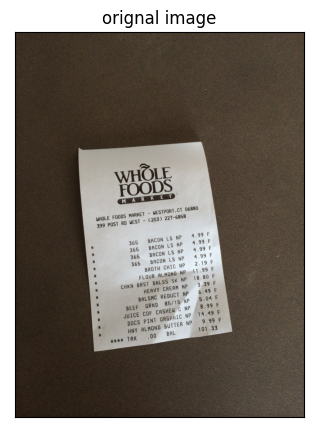

In [14]:
org_img = urlImg_Load(url)

## 2. edged 검출

In [15]:
# filter 를 통한 edged 검출 함수
def filter(img) :
    image = img.copy()
    # resize img 가로 길이를 500 으로 변환
    image = imutils.resize(image, width=500)
    
    # height, width, channel = image.shape
    # 원본의 width 를 resize 한 width 로 나눈다.
    ratio = img.shape[1] / float(image.shape[1])

    # 이미지를 grayscale 로 변환하고 blur 필터 적용
    # blur 를 통해 이미지를 흐리게, 날카롭게, 뚜렷하게, 노이즈 제거 등 다양한 효과를 줄수 있다.

    # 모서리 검출을 위한 이미지 연산
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # blur 파라미터를 적절하게 수정해야 한다.
    blurred = cv2.GaussianBlur(gray, (5, 5,), 0)

    # edged 로 변환
    edged = cv2.Canny(blurred, 75, 200)

    plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

    return edged

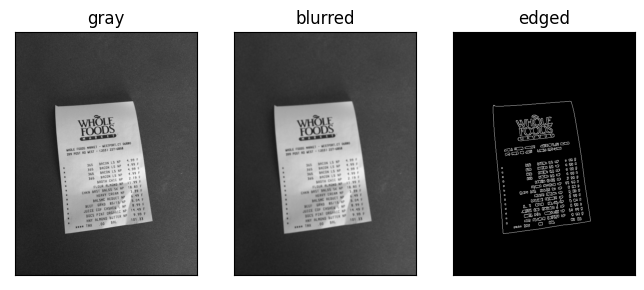

In [16]:
edged = filter(org_img)

## 3. 외각선 찾기

In [17]:
def Find_Contours(edged) :
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)

    receiptCnt = None

    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    count = 0
    print(len(cnts))
    for c in cnts :
        peri = cv2.arcLength(c, True)

        print('peri', peri)

        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        print('approx', approx)

        if len(approx) == 4 :
            count += 1
            receiptCnt = approx
            print(approx)
        #     break
    print(count)

In [18]:
Find_Contours(edged)

1
peri 1186.333041191101
approx [[[322 190]]

 [[110 200]]

 [[137 552]]

 [[375 518]]]
[[[322 190]]

 [[110 200]]

 [[137 552]]

 [[375 518]]]
1
